# Python for Data and Statistics

* **Instructor**: Thomas Fiore 
* **E-mail**: tmfiore@umich.edu (for any questions)
* **File Contributors**: Ronnie (Saerom) Lee, Jeffrey Lockhart, and Thomas Fiore
* **File History**: This file is Thomas Fiore's adaptation of Ronnie (Saerom) Lee's and Jeffrey Lockhart's 2018 Big Data Camp presentation file. The main changes are: creation and incorporation of an extract from the General Social Survey to replace earlier dataframe example, discussion of data read-in issues, incorporation of linear regression, and extending and editing text. Two new appendices are also added. Many thanks go to Jeff Lockhart for great suggestions on this adaptation as well. 

## Overview of Topics

* External Requirements for this File

* How to Import a Package or Part of a Package 

* Pandas DataFrames and Their Manipulations

* Missing Values

* Data Read-in Issues and How to Deal with Them

* Descriptive Statistics

* Split-Apply-Combine

* Linear Regression

* Appendices




## External Requirements: .csv File and Installation of `numpy` and `pandas` and `seaborn`

This notebook uses the file `GSS2012Extract_PresApproval_StrongPartyAffiliation_CLEAN.csv`
which was extracted from the General Social Survey using
[https://gssdataexplorer.norc.org/](https://gssdataexplorer.norc.org/). This extracted data set should *not* be used to draw conclusions since it was extracted in an exaggerated way for illustration purposes: only rows with strong party affiliation have been selected, so this is not a representative sample.    

Several other files with similar names are also needed. Please store the files in the same directory as this notebook. 

This notebook requires `numpy` and `pandas` to be installed on your system. To check if they are already installed on your system: 

* In Anaconda Navigator, go to `Environments`, set the filter to `Installed`, search for the desired package by scrolling or using the search field, and look at the check box.

Installation only needs to be done one time only. If these two packages are not installed, there are several ways to install them (separately):

* In Anaconda Navigator, go to `Environments`, then change the filter to `Not Installed`, search for the desired package by scrolling or using the search field, click the package checkbox, and click apply. For more details see the link [https://docs.anaconda.com/anaconda/navigator/tutorials/manage-packages/](https://docs.anaconda.com/anaconda/navigator/tutorials/manage-packages/)

OR

* At a conda prompt, type `conda install packagename`. See [https://docs.anaconda.com/anaconda/user-guide/tasks/install-packages/](https://docs.anaconda.com/anaconda/user-guide/tasks/install-packages/).

OR

* If you have the pip installer already installed on your system, at a prompt type `pip install packagname` (or if you're running both Python3 and Python2, specify which, e.g. `pip3 install packagname`). See [https://pip.pypa.io/en/stable/](https://pip.pypa.io/en/stable/).

After installation, the external packages `numpy` and `pandas` still need to be loaded into the notebook for present use. We do this below.  

### How to Import a Package or Part of a Package (Assuming it is Already Installed on Your System)

* Import a package of useful tools and functions:
    - `import packagename`

* Call a package and abbreviate its name for use in calls to functions from that package
    - `import packagename as abbreviation` 

* Import a specific function from the package (analogously import a class)
    - `from packagename import function`

* Import a specific function from a package and abbreviate its name (analogously import a class)
    - `from packagename import function as abbreviation`

## Pandas

In order to apply Python tools to a data set, we need to first move the data set into Python. Often a data set is stored in an excel spread sheet or comma separated file. When we read such a file into Python, we store the data set as a `dataframe`. The `pandas` package is designed for working with data frames. Let's learn how to read in a file to store the data set as a data frame, how to save data frames as files, and how to work with data frames using pandas.

But first in order to use pandas, we need to import the `numpy` and `pandas` packages. 

In [1]:
import numpy as np    # import numpy with its standard abbreviation for calls
import pandas as pd   # import pandas with its standard abbreviation for call

# The following makes plots show up here in the notebook.
# You do not need it if you are not using a notebook.
%matplotlib inline

###  How to Read an External csv, tsv, txt file, or Excel File to an Internal DataFrame in Python


The following lines are general code for you to adapt in future applications. The commands wouldn't run with general `filename`, so I wrote the general commands inside an `if False` block that never runs. 

The file must be in the same directory as your noteboook or Python script in the examples below. Otherwise use a directory in the command.

**Tip:** remember to specify the **separator**!

**Tip:** all of these commands try to infer whether or not your first row contains the column names (i.e. whether or not the first row is a header). 

In [2]:
if False:# ignore "if False", don't indent following when you use it

    # Read in a comma separated file as a dataframe called df. 
    df = pd.read_csv('filename.csv', sep = ',')
    df.head() # check the first lines of the read in 
    
    # Read in a tab separated file as a dataframe called df. 
    df = pd.read_csv('filename.tsv', sep = '\t')
    df.head() # check the first lines of the read in     

    # Read in a comma separated txt file as a dataframe called df. 
    df = pd.read_csv('filename.txt', sep = ',')
    df.head() # check the first lines of the read in 
    
    # Read in a tab separated txt file as a dataframe called df. 
    df = pd.read_csv('filename.txt', sep = '\t')
    df.head() # check the first lines of the read in    

In [3]:
if False:# ignore "if False", don't indent following when you use it

    # Read in an Excel File as a dataframe called df.
    with pd.ExcelFile('filename.xlsx') as xlsx:
        df = pd.read_excel(xlsx, sheet_name = 'Sheet1') #indent this line
    df.head() # check the first lines of the read in 
    
### If there are multiple sheets to read from use:
# with pd.ExcelFile('data.xlsx') as xlsx:
#    df_sheet1 = pd.read_excel(xlsx, sheet_name = 'Sheet1')
#    df_sheet2 = pd.read_excel(xlsx, sheet_name = 'Sheet2')

* Other formats you can read
    - **Stata**: pd.read_stata()     
    - **SAS**: pd.read_sas()         
    - **SQL**: pd.read_sql_table()   
    - **JSON**: pd.read_json()      
        - Especially useful when using **API**'s (tomorrow's session)
    - **HTML**: pd.read_html()       
        - Especially useful when scraping html (tomorrow's session)
    - and many more.

**Example.** Let's now actually read in the running example file. It is a .csv file. Let's check if the read in worked fine by looking at the first lines, the last lines, the column names, the data types of the columns, and the dimensions. Let's also check if there are any missing values. 

In [4]:
# Read in the comma separated EXAMPLE file as a dataframe called df. 
df = pd.read_csv('GSS2012Extract_PresApproval_StrongPartyAffiliation_CLEAN.csv', sep = ',')
df.head() # check the first lines of the read in 

,year,id,age,region_of_interview,size,party,pres_approval
0,2012,5,70,Middle atlantic,24,Strong democrat,Approve
1,2012,6,50,Middle atlantic,24,Strong democrat,Disapprove
2,2012,29,81,Middle atlantic,17,Strong democrat,Approve
3,2012,32,63,Middle atlantic,43,Strong democrat,Approve
4,2012,33,73,Middle atlantic,43,Strong democrat,Approve


In [5]:
# it is good practice to also look at the last lines
df.tail()

,year,id,age,region_of_interview,size,party,pres_approval
333,2012,1931,73,South atlantic,5,Strong republican,Disapprove
334,2012,1951,40,New england,6,Strong democrat,Approve
335,2012,1957,42,New england,2,Strong democrat,Approve
336,2012,1965,65,New england,1,Strong democrat,Approve
337,2012,1967,69,New england,1,Strong republican,Approve


In [6]:
# It is also a good practice to check if the names read in properly. 
df.columns
# looks good, no unexpected spaces in column names
# capitalization is consistent. 

Index(['year', 'id', 'age', 'region_of_interview', 'size', 'party',
       'pres_approval'],
      dtype='object')

In [7]:
# Let's check if pandas inferred the correct data types of the columns
df.dtypes
# Note: "object" type in pandas actually means string!
# The data types are as they should be. 

year                    int64
id                      int64
age                     int64
region_of_interview    object
size                    int64
party                  object
pres_approval          object
dtype: object

In [8]:
# Are there any missing values? 
df.isnull().sum()
# Great, no missing values. 

year                   0
id                     0
age                    0
region_of_interview    0
size                   0
party                  0
pres_approval          0
dtype: int64

In [9]:
df.shape # find the dimensions of the data frame as
# (number of rows, number of columns)
# The header does not count as a row. 

(338, 7)

Everything looks great! That's because the data was cleaned in advance... Later we'll see how to discover problems at read in and fix them.

### How to Save an Internal DataFrame to an External File 

Now let's go in the opposite direction. If you have cleaned a dataframe in Python in the course of an analysis, you will likely want to save it to an external file for future use, reproducibility, or for collaborators. We don't need this now, but here are the commands to store an internal dataframe to an external file. Of course, don't run this now.

In [10]:
if False:# ignore "if False", don't indent following when you use it

    # to save dataframe df to a comma separated file (.csv)
    df.to_csv('filename.csv', sep = ',',  index = False)

    # to save dataframe df to a tab separated file (.tsv)
    df.to_csv('filename.tsv', sep = '\t', index = False) 

    # to save dataframe df to a comma separated text file (.txt)
    df.to_csv('filename.txt', sep = ',', index = False) 

    # to save dataframe df to a tab separated text file (.txt)
    df.to_csv('filename.txt', sep = '\t', index = False) 

    # to save dataframe df to an excel file
    df.to_excel('filename.xlsx', index_label='label')

Tip: It might be better to store your dataframe as a **.tsv** file rather than .csv file because there may be commas in the values (e.g. "Lastname, Firstname").

- Other formats you can save to
    - **LaTeX**: df.to_latex()
    - **JSON**: df.to_json()
    - **Stata**: df.to_stata(name='file_name')
    - **SQL**: df.to_sql(name='file_name', con='engine_name')
    - and many more.

### Given a DataFrame, How to Rename, Add, and Remove Rows/Columns, and Make Entries of a Column Lower Case 


Notice that all of these methods return a new dataframe which I then store in the old variable name. These methods do **not** change the dataframe *in place" as you may have seen with some list methods. 

#### Rename a column

In [11]:
# Change "id" to "ID" and "age" to "AGE"
df = df.rename(columns={"id":"ID", "age": "AGE"}) # remember " "
df.head()

,year,ID,AGE,region_of_interview,size,party,pres_approval
0,2012,5,70,Middle atlantic,24,Strong democrat,Approve
1,2012,6,50,Middle atlantic,24,Strong democrat,Disapprove
2,2012,29,81,Middle atlantic,17,Strong democrat,Approve
3,2012,32,63,Middle atlantic,43,Strong democrat,Approve
4,2012,33,73,Middle atlantic,43,Strong democrat,Approve


In [12]:
# Change "ID" to "id" and AGE" to "age" back again
df = df.rename(columns={"ID":"id", "AGE": "age"}) # remember " "
df.head()

,year,id,age,region_of_interview,size,party,pres_approval
0,2012,5,70,Middle atlantic,24,Strong democrat,Approve
1,2012,6,50,Middle atlantic,24,Strong democrat,Disapprove
2,2012,29,81,Middle atlantic,17,Strong democrat,Approve
3,2012,32,63,Middle atlantic,43,Strong democrat,Approve
4,2012,33,73,Middle atlantic,43,Strong democrat,Approve


#### Add a Column Using a List

In [13]:
# add a column called 'default' that is all zeroes
# dataframename['newcolumnname'] = list
df['default'] = [0]*338 # list of 338 zeroes
df.head()

,year,id,age,region_of_interview,size,party,pres_approval,default
0,2012,5,70,Middle atlantic,24,Strong democrat,Approve,0
1,2012,6,50,Middle atlantic,24,Strong democrat,Disapprove,0
2,2012,29,81,Middle atlantic,17,Strong democrat,Approve,0
3,2012,32,63,Middle atlantic,43,Strong democrat,Approve,0
4,2012,33,73,Middle atlantic,43,Strong democrat,Approve,0


#### Remove a Column by Column Name


In [278]:
# remove the 'default' column
# axis = 1 denotes that we are referring to a column, not a row
df = df.drop('default', axis = 1)
df.head()
# we see the 'default' column is gone

,year,id,age,region_of_interview,size,party,pres_approval
0,2012,5,70,Middle atlantic,24,Strong democrat,Approve
1,2012,6,50,Middle atlantic,24,Strong democrat,Disapprove
2,2012,29,81,Middle atlantic,17,Strong democrat,Approve
3,2012,32,63,Middle atlantic,43,Strong democrat,Approve
4,2012,33,73,Middle atlantic,43,Strong democrat,Approve


####  Add Rows Using `.append()`, i.e. Stack Two DataFrames

In [279]:
# First, let's read in a second copy of the data set
# just to have a second dataframe to work with
df2 = pd.read_csv('GSS2012Extract_PresApproval_StrongPartyAffiliation_CLEAN.csv', sep = ',')
df2.shape

(338, 7)

In [280]:
# Append the new dataframe df2 to the existing dataframe df
dfstacked= df.append(df2, ignore_index=True)
dfstacked.shape # see that we have double the rows
# same number of columns

(676, 7)

Or an alternative way to stack dataframes is to use `pd.concat()`

In [281]:
# We use axis = 0 to indicate we are stacking rows 
# rather than columns
dfstacked = pd.concat([df, df2], axis = 0, ignore_index = True)    
dfstacked.shape

(676, 7)

#### Remove a Row by Row Name/Number (Remember First Row is Zero)

In [282]:
# The row names in the example are the row numers
# Let's remove the 676th row, and 
# check it is gone
dfstacked = dfstacked.drop(675) # remember 0 indexing in Python!
dfstacked.tail()

,year,id,age,region_of_interview,size,party,pres_approval
670,2012,1919,66,South atlantic,4,Strong republican,Disapprove
671,2012,1931,73,South atlantic,5,Strong republican,Disapprove
672,2012,1951,40,New england,6,Strong democrat,Approve
673,2012,1957,42,New england,2,Strong democrat,Approve
674,2012,1965,65,New england,1,Strong democrat,Approve


#### Remove Duplicate Rows

First check whether or not there are any duplicate rows.

In [283]:
# The method df.duplicated() returns a series of 
# True/False, True when a row is a duplicate of a previous row
# any() asks if any of them are True
any(dfstacked.duplicated())

True

We see there are duplicates. Of course! `dftstacked` was the same dataframe repeated twice.

In [284]:
# If there are duplicates, then run the following code
dfstacked_cleaned = dfstacked.drop_duplicates()
dfstacked_cleaned.shape
# dimensions confirm we removed all duplicates.

(338, 7)

### Make Entries of a Column of Strings Lowercase

In [285]:
df['region_of_interview'] = df['region_of_interview'].str.lower()
df['party'] = df['party'].str.lower()
df['pres_approval'] = df['pres_approval'].str.lower()
df.head()

,year,id,age,region_of_interview,size,party,pres_approval
0,2012,5,70,middle atlantic,24,strong democrat,approve
1,2012,6,50,middle atlantic,24,strong democrat,disapprove
2,2012,29,81,middle atlantic,17,strong democrat,approve
3,2012,32,63,middle atlantic,43,strong democrat,approve
4,2012,33,73,middle atlantic,43,strong democrat,approve


### How to See What is in a DataFrame, Sort a DataFrame, and Obtain Columns, Rows, and Sub DataFrames 
#### Print the First and Last Rows of the DataFrame

In [286]:
# Print the first 3 rows
df.head(3) 

,year,id,age,region_of_interview,size,party,pres_approval
0,2012,5,70,middle atlantic,24,strong democrat,approve
1,2012,6,50,middle atlantic,24,strong democrat,disapprove
2,2012,29,81,middle atlantic,17,strong democrat,approve


In [287]:
# Print the last 4 rows
df.tail(4) 

,year,id,age,region_of_interview,size,party,pres_approval
334,2012,1951,40,new england,6,strong democrat,approve
335,2012,1957,42,new england,2,strong democrat,approve
336,2012,1965,65,new england,1,strong democrat,approve
337,2012,1967,69,new england,1,strong republican,approve


#### Display the Row Names, Column Names, and the Underlying Data

In [288]:
# display the row names, which are called indices
df.index
# in this example, the row names are 
# just the integer row numbers, 
# of course using 0-indexing!

RangeIndex(start=0, stop=338, step=1)

In [289]:
# display the column names
df.columns

Index(['year', 'id', 'age', 'region_of_interview', 'size', 'party',
       'pres_approval'],
      dtype='object')

In [290]:
# display the rows
df.values

array([[2012, 5, 70, ..., 24, 'strong democrat', 'approve'],
       [2012, 6, 50, ..., 24, 'strong democrat', 'disapprove'],
       [2012, 29, 81, ..., 17, 'strong democrat', 'approve'],
       ...,
       [2012, 1957, 42, ..., 2, 'strong democrat', 'approve'],
       [2012, 1965, 65, ..., 1, 'strong democrat', 'approve'],
       [2012, 1967, 69, ..., 1, 'strong republican', 'approve']],
      dtype=object)

#### Select a Column Using `dataframename[  'columnname'  ]`

In [291]:
df[ 'region_of_interview' ].head()
# here .head() was included for readability of output

0    middle atlantic
1    middle atlantic
2    middle atlantic
3    middle atlantic
4    middle atlantic
Name: region_of_interview, dtype: object

#### Select a Column Using `dataframename.columnname`

In [292]:
df.region_of_interview.head()
# here .head() was included for readability of output

0    middle atlantic
1    middle atlantic
2    middle atlantic
3    middle atlantic
4    middle atlantic
Name: region_of_interview, dtype: object

#### Select Multiple Columns with `df[  [listof'colnames']  ]`

In [293]:
df[ ['region_of_interview','age']  ].head()

,region_of_interview,age
0,middle atlantic,70
1,middle atlantic,50
2,middle atlantic,81
3,middle atlantic,63
4,middle atlantic,73


#### Select a Row Based on a Unique Identifier or Characteristic

Display the row with `id` number 797, not row number 797. **NOTE:** This is the recommended way to find a row, instead of trying to index in using a row number.  

In [294]:
df[ df.id==797 ]
# or
df[ df['id']==797 ]

,year,id,age,region_of_interview,size,party,pres_approval
132,2012,797,51,pacific,466,strong republican,disapprove


####  Obtain the Sub DataFrame of Rows that Satisfy a Condition Using `dataframename[ BooleanCondition ] `

In [295]:
# Take the sub dataframe of only those who approved 
df_only_approve = df[ df.pres_approval == 'approve' ]
# or
df_only_approve = df[ df['pres_approval'] == 'approve' ]

df_only_approve.head(3)

,year,id,age,region_of_interview,size,party,pres_approval
0,2012,5,70,middle atlantic,24,strong democrat,approve
2,2012,29,81,middle atlantic,17,strong democrat,approve
3,2012,32,63,middle atlantic,43,strong democrat,approve


How can we count the number of participants who indicated 'Approve'?

In [296]:
df_only_approve.shape

(203, 7)

In [297]:
# Take the sub dataframe of those over 85
df[ df.age>85 ]
# or
df[ df['age']>85 ]

,year,id,age,region_of_interview,size,party,pres_approval
63,2012,431,87,w. sou. central,1198,strong republican,disapprove
89,2012,558,86,south atlantic,166,strong democrat,approve
290,2012,1709,88,mountain,26,strong republican,disapprove


#### Select Entry of Sub DataFrame Using Matrix-like Notation withnames `dataframename.loc["rowname","columnname"]` 

In [298]:
# dataframename.loc["rowname","columnname"]
df.loc[0,'age'] # notice loc without i
# in this example the rownames are the integer row numbers

70

#### Sort the Rows in Order by Values in a Designated Column: Ascending or Descending

In [299]:
# Ascending order is default
df_sorted_by_age = df.sort_values(by='age')   
df_sorted_by_age.head(4) 
# The original dataframe is unchanged!
# Like the others, this does not sort "in place". 
# Rows with missing values in the sorting variable
# are at the end. 

,year,id,age,region_of_interview,size,party,pres_approval
285,2012,1679,18,pacific,1,strong democrat,approve
200,2012,1187,19,south atlantic,67,strong republican,disapprove
159,2012,963,19,e. nor. central,40,strong republican,disapprove
32,2012,202,20,pacific,23,strong democrat,approve


In [300]:
# Descending order is an option
df_sorted_by_age = df.sort_values(by='age', ascending=False)
df_sorted_by_age.head(4)
# The original dataframe is unchanged!
# Like the others, does not sort "in place". 
# Rows with missing values in the sorting variable
# are at the end. 

,year,id,age,region_of_interview,size,party,pres_approval
290,2012,1709,88,mountain,26,strong republican,disapprove
63,2012,431,87,w. sou. central,1198,strong republican,disapprove
89,2012,558,86,south atlantic,166,strong democrat,approve
214,2012,1242,84,e. sou. central,22,strong republican,disapprove


### How to Merge Two DataFrames Using `merge`


In [301]:
if False:# ignore "if False", don't indent following when you use it
    
    dataframename1.merge(dataframename2, on='columnname')

**Important parameter in `merge`: how = {'left', 'right', 'outer', 'inner'}**
 
**inner** (*default*): use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys
 
**outer**: use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically
 
**left**: use only keys from left frame, similar to a SQL left outer join; preserve key order

**right**: use only keys from right frame, similar to a SQL right outer join; preserve key order

### Missing data: Identifying Missing Data and Options to Handle Missing Data

### Warning: Be Careful about Removing Rows/Columns with Missing Data! Consult with the  Experimenters. Determine if there is a pattern or missing at random, etc. Consult with an expert on data imputation.

In [302]:
# Read in the original NOT PRE-CLEANED example file
df_original = pd.read_csv('GSS2012Extract_PresApproval_StrongPartyAffiliation.csv', sep = ',')
df_original.tail()

,year,id,age,region_of_interview,size,party,pres_approval
336,2012.0,1957.0,42,New england,2.0,Strong democrat,Approve
337,2012.0,1965.0,65,New england,1.0,Strong democrat,Approve
338,2012.0,1967.0,69,New england,1.0,Strong republican,Approve
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN


####  Check whether there is missing data

In [303]:
df_original.isnull().sum()

year                   2
id                     2
age                    2
region_of_interview    2
size                   2
party                  2
pres_approval          2
dtype: int64

#### Option 1: Drop All Rows with Any Missing Data

In [304]:
df_original_droppedrows = df_original.dropna(how='any')
df_original_droppedrows.tail(3)

,year,id,age,region_of_interview,size,party,pres_approval
336,2012.0,1957.0,42,New england,2.0,Strong democrat,Approve
337,2012.0,1965.0,65,New england,1.0,Strong democrat,Approve
338,2012.0,1967.0,69,New england,1.0,Strong republican,Approve


#### Option 2: Drop All Columns with Missing Data (not a good option!)

In [305]:
# axis = 1 denotes that we are referring to a column, not a row
df_original_droppedcolumns = df_original.dropna(how='any', axis = 1)
df_original_droppedcolumns.tail(3)

""
338
339
340


####  Option 3: Fill in ALL missing data with a single value

In [306]:
df_original_filled0 = df_original.fillna(value = 0)
df_original_filled0.tail()
# Dangerous because 0 could be misinterpreted! 
# Not recommended except for special use cases. 
# Might want to instead fill in certain entries
# with the mean or median of that variable in similar rows, etc.

,year,id,age,region_of_interview,size,party,pres_approval
336,2012.0,1957.0,42,New england,2.0,Strong democrat,Approve
337,2012.0,1965.0,65,New england,1.0,Strong democrat,Approve
338,2012.0,1967.0,69,New england,1.0,Strong republican,Approve
339,0.0,0.0,0,0,0.0,0,0
340,0.0,0.0,0,0,0.0,0,0


#### Option 4: Fill in a value by name location (if you obtained the value, or if you have a reasonable value to fill in with, such as the mean or median of that variable in similar rows)

In [307]:
df_original.loc[339, 'age'] = 55
df_original.tail()

,year,id,age,region_of_interview,size,party,pres_approval
336,2012.0,1957.0,42,New england,2.0,Strong democrat,Approve
337,2012.0,1965.0,65,New england,1.0,Strong democrat,Approve
338,2012.0,1967.0,69,New england,1.0,Strong republican,Approve
339,NaN,NaN,55,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Tip**: There are actually more missing values than the two rows detected by Python! The method `dataframename.isnull().sum()` did not see the missing value that a human coded as "No Answer"! Later we'll see how to discover it... 

### Data Read-In Issues and How to Fix Them: Data Cleaning 

In [308]:
# Read in the original NOT PRE-CLEANED example file
df_original = pd.read_csv('GSS2012Extract_PresApproval_StrongPartyAffiliation.csv', sep = ',')
df_original.head() # check the first lines of the read in 

,year,id,age,region_of_interview,size,party,pres_approval
0,2012.0,5.0,70,Middle atlantic,24.0,Strong democrat,Approve
1,2012.0,6.0,50,Middle atlantic,24.0,Strong democrat,Disapprove
2,2012.0,29.0,81,Middle atlantic,17.0,Strong democrat,Approve
3,2012.0,32.0,63,Middle atlantic,43.0,Strong democrat,Approve
4,2012.0,33.0,73,Middle atlantic,43.0,Strong democrat,Approve


By checking the first few lines above, we already see problems. The year was read in as float, as was the id. What could cause that? Next look at the tail and we see there were some completely empty rows at the end. 

In [309]:
df_original.tail()

,year,id,age,region_of_interview,size,party,pres_approval
336,2012.0,1957.0,42,New england,2.0,Strong democrat,Approve
337,2012.0,1965.0,65,New england,1.0,Strong democrat,Approve
338,2012.0,1967.0,69,New england,1.0,Strong republican,Approve
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's have a look at the column names. We see that the first column name has unnoticed spaces. 

In [310]:
df_original.columns

Index(['year              ', 'id', 'age', 'region_of_interview', 'size',
       'party', 'pres_approval'],
      dtype='object')

**Funny thing: None of the above problems are visible in the excel file. Open it and look! Even when I open the csv file in excel it isn't visible. Some of the problems you can see in the csv file in a text editor.**

Let's check the data types of the columns to see if anything else when wrong. Bizarre: `age` was read in as a string.  

In [311]:
# find the data types of the columns
df_original.dtypes

year                   float64
id                     float64
age                     object
region_of_interview     object
size                   float64
party                   object
pres_approval           object
dtype: object

A lot went wrong. Let's fix the data types. 

**Warning:** In pandas, you cannot cast `NaN` as an integer! It gives an error. You can only cast `NaN` to a float.  So I have to first remove the `NaN`'s if I want to cast to an integer, or I have to just be satisfied with `id` numbers being floats if there are `NaN`'s in the `id` column.

**Warning:** Even after removing all `NaN`, I tried to cast `age` as an integer and it still didn't work! The error message indicated there was a row with `No answer` for `age`, so we must also remove that row, or change that entry to `NaN`. 

In [312]:
# rename year without spaces
df_cleaned = df_original.rename(columns={'year              ':'year'})

# remove row with id 1273 because it has age with "No Answer"
df_cleaned = df_cleaned[ df_original.id != 1273 ]

# remove all rows with any NaN
df_cleaned = df_cleaned.dropna(how='any')

# change the data type to integer where it should be integer
df_cleaned = df_cleaned.astype({'year':'int',
                                'id':'int',
                                'age':'int'})

# view the data types again to confirm the changes
df_cleaned.dtypes

year                     int32
id                       int32
age                      int32
region_of_interview     object
size                   float64
party                   object
pres_approval           object
dtype: object

It would have been a lot easier to clean the data in excel before read in! But altering in excel wouldn't be recorded for reproducible research...

### Descriptive Statistics of Numerical Columns of a DataFrame

#### The Method `describe` Shows Quick Summary Statistics of Numerical Variables

In [313]:
# change id to categorical variable so it isn't averaged in summary statistics
df = df.astype({'id':'category'}) 

df.describe()

,year,age,size
count,338.0,338.000000,338.000000
mean,2012.0,52.420118,494.142012
std,0.0,16.821135,1639.194581
min,2012.0,18.000000,0.000000
25%,2012.0,39.250000,8.000000
50%,2012.0,53.000000,30.000000
75%,2012.0,65.000000,136.250000
max,2012.0,88.000000,8175.000000


TOO MANY ZEROS! Let's round to 1 decimal places. 

In [314]:
df.describe().round(1)

,year,age,size
count,338.0,338.0,338.0
mean,2012.0,52.4,494.1
std,0.0,16.8,1639.2
min,2012.0,18.0,0.0
25%,2012.0,39.2,8.0
50%,2012.0,53.0,30.0
75%,2012.0,65.0,136.2
max,2012.0,88.0,8175.0


####  Find the Means of Numerical Columns

In [315]:
df.mean().round(1)

year    2012.0
id       994.3
age       52.4
size     494.1
dtype: float64

####  Find the Medians of Numerical Columns

In [316]:
df.median().round(2)

year    2012.0
id      1022.5
age       53.0
size      30.0
dtype: float64

#### Find the Min/Max of a Column

In [317]:
df['age'].min().round(2)

18

In [318]:
df['age'].max().round(2)

88

#### Find the Variance of Numerical Columns

In [319]:
df.var().round(2)

year          0.00
id       310414.64
age         282.95
size    2686958.88
dtype: float64

#### Find the Correlation of Numerical Columns

In [320]:
df.corr().round(2)

,year,age,size
year,NaN,NaN,NaN
age,NaN,1.0,0.0
size,NaN,0.0,1.0


### Split-Apply-Combine for Computing Descriptive Statistics on Groups and Arranging the Group Statistics in a DataFrame for Easy Comparison

* Split the data into groups based on some criteria (e.g. entry in a column)
* Apply a function (e.g. mean) to each group independently
* Combine the results into a data structure (e.g. a data frame)

In [321]:
df.groupby('region_of_interview').mean()

,year,age,size
region_of_interview,,,
e. nor. central,2012.0,51.323077,184.338462
e. sou. central,2012.0,51.962963,116.296296
middle atlantic,2012.0,54.024390,2879.902439
mountain,2012.0,54.470588,351.352941
new england,2012.0,51.230769,20.615385
pacific,2012.0,51.138889,150.833333
south atlantic,2012.0,52.809524,127.476190
w. nor. central,2012.0,48.722222,77.388889
w. sou. central,2012.0,54.540541,271.621622


We can further subdivide the groups according to a second variable. 

In [322]:
df.groupby(['region_of_interview', 'pres_approval']).mean()

year        age         size
region_of_interview pres_approval                                
e. nor. central     approve        2012.0  51.531250   267.906250
                    disapprove     2012.0  51.121212   103.303030
e. sou. central     approve        2012.0  55.000000   120.142857
                    disapprove     2012.0  48.692308   112.153846
middle atlantic     approve        2012.0  54.529412  3228.588235
                    disapprove     2012.0  51.571429  1186.285714
mountain            approve        2012.0  50.571429   539.714286
                    disapprove     2012.0  57.200000   219.500000
new england         approve        2012.0  49.636364    22.363636
                    disapprove     2012.0  60.000000    11.000000
pacific             approve        2012.0  52.259259   144.925926
                    disapprove     2012.0  47.777778   168.555556
south atlantic      approve        2012.0  51.725490   140.941176
                    disapprove     2012.0  54.484848   106.666667
w. nor. central     approve        2012.0  46.615385    94.384615
                    disapprove     2012.0  54.200000    33.200000
w. sou. central     approve        2012.0  53.571429   355.571429
                    disapprove     2012.0  55.130435   220.521739

#### Pivot tables

[https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)

### Linear Regression (Ordinary Least Squares)

Let's first create a dataframe called `proportions` which has two columns. The first column is the proportion of strong democrats amongst those who indicated strong party affiliation, grouped by region. The second column is the proportion of presidential approval amongst those who indicated strong party affiliation, grouped by region.
Don't worry about understanding this code. We will use these two columns for the regression. 

In [323]:
strong_dem_proportions=df.groupby('region_of_interview').party.apply(lambda x: (x == 'strong democrat').mean())
approval_proportions=df.groupby('region_of_interview').pres_approval.apply(lambda x: (x == 'approve').mean())
proportions = pd.DataFrame({'strong_dem_proportions':strong_dem_proportions,
                           'approval_proportions':approval_proportions})
proportions.head(4)

,strong_dem_proportions,approval_proportions
region_of_interview,,
e. nor. central,0.600000,0.492308
e. sou. central,0.555556,0.518519
middle atlantic,0.878049,0.829268
mountain,0.411765,0.411765


Before computing the regression summary, let's look at a scatter plot and the best fit line. 

Text(0, 0.5, 'Proportion of Presidential Approval Amongst Voters with\nStrong Party Affiliation in Region')

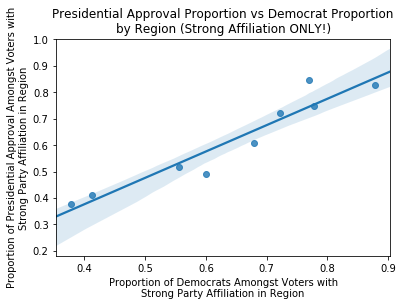

In [324]:
import seaborn as sns
myplot=sns.regplot(x=strong_dem_proportions, y=approval_proportions, data=proportions)
myplot.set_title("Presidential Approval Proportion vs Democrat Proportion\nby Region (Strong Affiliation ONLY!)")
myplot.set_xlabel("Proportion of Democrats Amongst Voters with\nStrong Party Affiliation in Region")
myplot.set_ylabel("Proportion of Presidential Approval Amongst Voters with\nStrong Party Affiliation in Region")

Now let's actually do the regression and look at the output. 

In [325]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

result_ols = smf.ols('approval_proportions~strong_dem_proportions', data=proportions).fit()
print(result_ols.summary())

                             OLS Regression Results                             
Dep. Variable:     approval_proportions   R-squared:                       0.912
Model:                              OLS   Adj. R-squared:                  0.900
Method:                   Least Squares   F-statistic:                     72.91
Date:                  Fri, 14 Jun 2019   Prob (F-statistic):           6.00e-05
Time:                          14:16:49   Log-Likelihood:                 14.300
No. Observations:                     9   AIC:                            -24.60
Df Residuals:                         7   BIC:                            -24.20
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercep

C:\Users\Tom\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


Shockingly, the slope is essentially 1. But don't jump to any conclusions: the extracted data was only participants who indicated strong party affiliation! 

### Creating New Columns that are Transformations of Other Columns
* Natural logarithm: `np.log()`
* Base 10 logarithm: `np.log10()`
* Base 2 logarithm: `np.log2()`
* Square root: `np.sqrt()`
* Square: `x**2`

In [326]:
df['size_squareroot'] = np.sqrt(df['size'])
df.head(3)

,year,id,age,region_of_interview,size,party,pres_approval,size_squareroot
0,2012,5,70,middle atlantic,24,strong democrat,approve,4.898979
1,2012,6,50,middle atlantic,24,strong democrat,disapprove,4.898979
2,2012,29,81,middle atlantic,17,strong democrat,approve,4.123106


In [327]:
df['age_squared'] = (df['age'])**2
df.head(3)

,year,id,age,region_of_interview,size,party,pres_approval,size_squareroot,age_squared
0,2012,5,70,middle atlantic,24,strong democrat,approve,4.898979,4900
1,2012,6,50,middle atlantic,24,strong democrat,disapprove,4.898979,2500
2,2012,29,81,middle atlantic,17,strong democrat,approve,4.123106,6561


### Appendix 1: (Not for Beginners) How to Index into a DataFrame using Slicing and Matrix Notation

#### Select Rows Using `dataframename[ slice ]`: NOT RECOMMENDED, better to select by content!

`df[1]` will not give you row 1, it will be an error, but `df[0:3]` will give you rows 0,1,2. 

In [328]:
df[0:3] # WARNING: different from R! 
# In python rows and columns are 
# selected the same way, just with slice
# rather than name

# This slicing does NOT include the last number

,year,id,age,region_of_interview,size,party,pres_approval,size_squareroot,age_squared
0,2012,5,70,middle atlantic,24,strong democrat,approve,4.898979,4900
1,2012,6,50,middle atlantic,24,strong democrat,disapprove,4.898979,2500
2,2012,29,81,middle atlantic,17,strong democrat,approve,4.123106,6561


### Appendix 2: (Not for Beginners) `iloc` versus `loc` in Regards to Slicing

`iloc` is for integer matrix-like notation or `[integerrow,integercolumn]`, whereas `loc` uses names in both. 

In [329]:
df.iloc[0,3]  # with i use indices, won't work with column names

'middle atlantic'

In [330]:
df.loc[0,'region_of_interview'] # without i use row name and column name
# in this example the row names are the same as the row numbers

'middle atlantic'

In [331]:
df.iloc[10:12,[2,3]] 

# this slicing with i of row numbers does NOT include the last number!

,age,region_of_interview
10,49,middle atlantic
11,48,middle atlantic


In [332]:
# Similarly get a sub dataframe 
# using a slice of row names and a list of 
# column names without i 
df=df.rename(index=str) # change row numbers to strings to be row names
print(df.loc['10':'12',['age','region_of_interview']])

# This slicing of row names without i includes the last number!
# Contrast with previous example!
# Better to select by content to avoid mistakes!

# Let's change row names back to integers in order
# to avoid messing up other parts of file
df=df.rename(index=int) 

    age region_of_interview
10   49     middle atlantic
11   48     middle atlantic
12   43     middle atlantic


### Appendix 3: How to Create a DataFrame From a Dictionary

In [333]:
# data is stored as a dictionary {key1: value1, ...}
data = {'Course'  : 'Intro to Big Data', # Strings
        'Section' : 4, # Int
        'Names'   : ['Abigail', 'Jeff', 'Mana', 'Patrick'], # List
        'Group'   : ['1'] * 2 + ['2'] * 2,
        'Date'    : pd.Timestamp.today().date()} # Time stamps

df1 = pd.DataFrame(data)
df1

,Course,Section,Names,Group,Date
0,Intro to Big Data,4,Abigail,1,2019-06-14
1,Intro to Big Data,4,Jeff,1,2019-06-14
2,Intro to Big Data,4,Mana,2,2019-06-14
3,Intro to Big Data,4,Patrick,2,2019-06-14
